## Analyse Nutzung
Überblick über die Nutzungsart der Gebäude

In [21]:
import pandas as pd
import seaborn as sns
import dataset.importer as im

df = im.get_dataset('dataset/dataset.csv')
pd.set_option('display.max_rows', 500) # to show all value_counts


#### Verteilung im Datenset


In [22]:
df[im.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           244
SCHULEN          163
HALLEN            88
BUERO             86
BETRIEB           61
BEHERBERGUNG      56
KULTUS_KULTUR     26
GESUNDHEIT        24
ANDERES           14
TECHNIK            8
OFFENE_BAUTEN      8
IRRELEVANT         7
AUSSENANLAGEN      1
Name: usage_cluster, dtype: int64

In [23]:
df[im.FIELD_NOM_USAGE_MAIN].value_counts()

WOHNBAUTEN__MFH_MEDIUM                                                                108
SCHULBAUTEN__VOLKSSCHULEN                                                              87
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN     43
WOHNBAUTEN__MFH_LOW                                                                    31
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                       28
VERKEHRSBAUTEN__WERKHOEFE                                                              28
WOHNBAUTEN__EFH_REIHEN_MEDIUM                                                          28
BUEROBAUTEN__VOLLAUSBAU                                                                27
WOHNBAUTEN__MFH_HIGH                                                                   25
VERWALTUNGSBAUTEN                                                                      23
WOHNBAUTEN__EFH_REIHEN_HIGH                                                            19
GESUNDHEIT

## Nutzungen kombinieren
Der Datensatz enthält sehr unterschiedliche Datenmengen pro Nutzungstyp. Wenn zu wenig Daten vorhanden sind, macht das Verwenden des Felds 'usage_cluster' oder weiteres Zusammenfassen Sinn. Für Nutzungstypen mit vielen Daten (Wohnen, Schulen etc.) macht es Sinn, ein spezifischeren Typ zu verwenden.

**Mehrfamilienhäuser**<br>
WOHNBAUTEN__MFH_MEDIUM<br>
WOHNBAUTEN__MFH_LOW<br>
WOHNBAUTEN__MFH_HIGH<br>

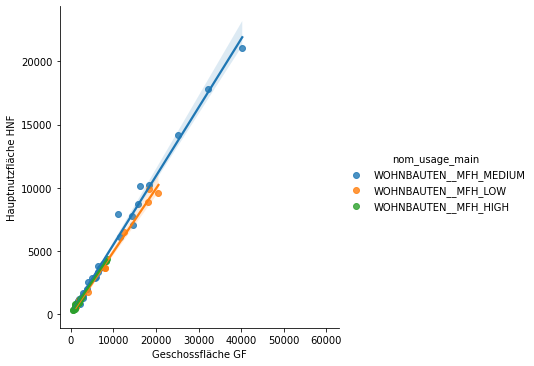

In [24]:

types_wohnen_mfh = ['WOHNBAUTEN__MFH_HIGH', 'WOHNBAUTEN__MFH_MEDIUM','WOHNBAUTEN__MFH_LOW']
mfh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_mfh)]

# TODO: duplicated code for plot. Reuse
gf = sns.lmplot(
    data=mfh_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    hue=im.FIELD_NOM_USAGE_MAIN
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')

**Einfamilienhäuser**<br>
WOHNBAUTEN__EFH_REIHEN_LOW<br>
WOHNBAUTEN__EFH_REIHEN_MEDIUM<br>
WOHNBAUTEN__EFH_REIHEN_HIGH

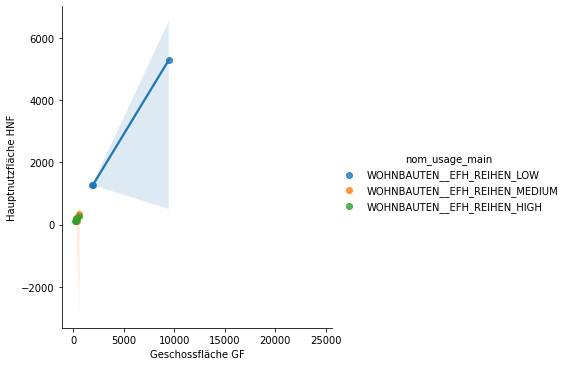

In [25]:
types_wohnen_efh = ['WOHNBAUTEN__EFH_REIHEN_LOW', 'WOHNBAUTEN__EFH_REIHEN_MEDIUM','WOHNBAUTEN__EFH_REIHEN_HIGH']
efh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_efh)]

# TODO: duplicated code for plot. Reuse
gf = sns.lmplot(
    data=efh_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    hue=im.FIELD_NOM_USAGE_MAIN
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')

**Schulen sinnvoll aufteilen?**<br>
SCHULBAUTEN__VOLKSSCHULEN<br>
SCHULBAUTEN__KINDERGAERTEN_HORTE<br>
SCHULBAUTEN__BERUFSSCHULEN<br>
SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR<br>
SCHULBAUTEN__BIBLIOTHEKEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR<br>
SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN<br>

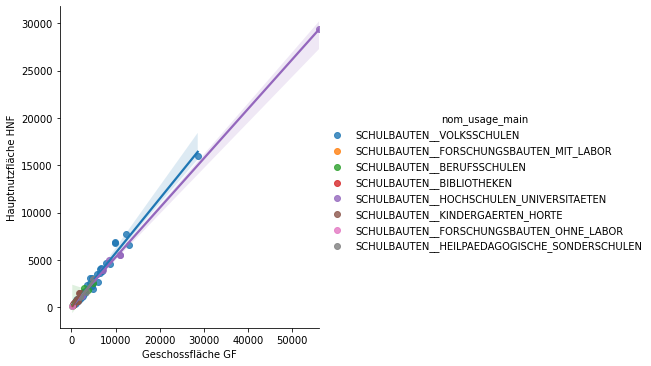

In [26]:
types_schulen = ['SCHULBAUTEN__VOLKSSCHULEN',
                    'SCHULBAUTEN__KINDERGAERTEN_HORTE',
                    'SCHULBAUTEN__BERUFSSCHULEN',
                    'SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN',
                    'SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR',
                    'SCHULBAUTEN__BIBLIOTHEKEN',
                    'SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR',
                    'SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN'
                    ]
schulen_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_schulen)]

# TODO: duplicated code for plot. Reuse
gf = sns.lmplot(
    data=schulen_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    hue=im.FIELD_NOM_USAGE_MAIN
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')

**Rest**<br>
Vermutlich vorerst auf Usage Cluster zurückgreifen.


